# Principal Component Analysis

This warm-up challenge will help you gain intuition about how a **Principal Component Analysis** works.  

## (1) Generate Data

We want a dataset with **100 observations** and **2 correlated features**

👇 Run the cell below to generate your data  
💡 Notice the (high) correlation between your two features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a dataset with 100 observations and 2 correlated features.
seed = np.random.RandomState(42)
feature_1 = seed.normal(5, 1, 100)
feature_2 = .7 * feature_1 + seed.normal(0, .5, 100)
X = np.array([feature_1, feature_2]).T
X = pd.DataFrame(X)

X.corr().round(3)

,0,1
0,1.00,0.77
1,0.77,1.00


❓ Draw a scatter plot of your two features against each other

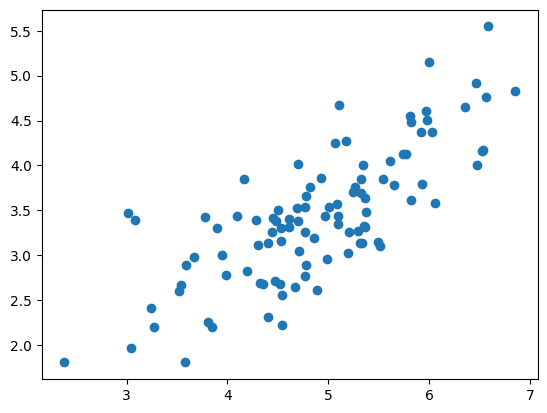

In [2]:
plt.scatter(feature_1, feature_2)

☝️ You can identify the positive correlation between the features  

Our observations are packed along a single line, it is not easy to spot differences between them

💡 PCA will help us find the directions (the so-called "principal components") that cancel out this correlation.

## (2) Principal Components

👉 Import `PCA` from `sklearn` and instantiate a model with `n_components=2`

❓Fit it on your `X`, and assign it to `pca`

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Let's focus on two objects in that `PCA`: 

* `pca.components_`: it's a set of eigenvectors which point to the directions where the variance is maximally explained: the **directions of maximum variance**.

* `pca.explained_variance_`:  $Var(Principal  Component)$, given by the corresponding L2 norm of these eigenvectors.

    * `pca.explained_variance_ratio_`:  $ = \frac{Var(Principal\; Component)}{\sum Var(Principal\; Component)}$

In [4]:
# Vector coordinates of each Principal Component
pca.components_

array([[-0.79286897, -0.60939216],
       [-0.60939216,  0.79286897]])

In [5]:
# Explained Variance for each Principal Component
# Ranked by decreasing order of importance
pca.explained_variance_

array([1.2231014 , 0.15046893])

In [6]:
# Explained Variance Ratio for each Principal Component
# Ranked by decreasing order of importance

# It is exactly the explained variance for each component...
# ... divided by the sum of explained variances !
pca.explained_variance_ratio_

array([0.89045415, 0.10954585])

👇 Run the cell below to visualize your two Principal Components

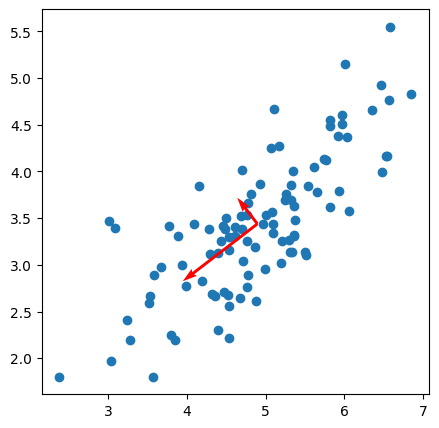

In [7]:
plt.figure(figsize=(5,5))

plt.scatter(X[0], X[1])

for (length, vector) in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) # Square root of their lenghts to compare same "units"
    plt.quiver(*X.mean(axis=0), *v, units='xy', scale=1, color='r')

💡 The length of the vector is a measure of the standard deviation of the dataset when projected onto this axis!

💡 We can then use those directions (these "principal components") to "explain" most of our observations behavior - most of the distinction between observations happens along these axis. 

## (3) Apply PCA

We can use these components to project every sample of our dataset onto the directions of maximum variance.

❓ ***Questions*** ❓

1. Use the `transform` method of your `pca` on `X` and store the result in `X_transformed`  
2. Plot your projected features in `X_transformed`against one another.  
3.  Compute the correlation between your transformed features in `X_transformed`

In [10]:
X_transformed = pca.transform(X)

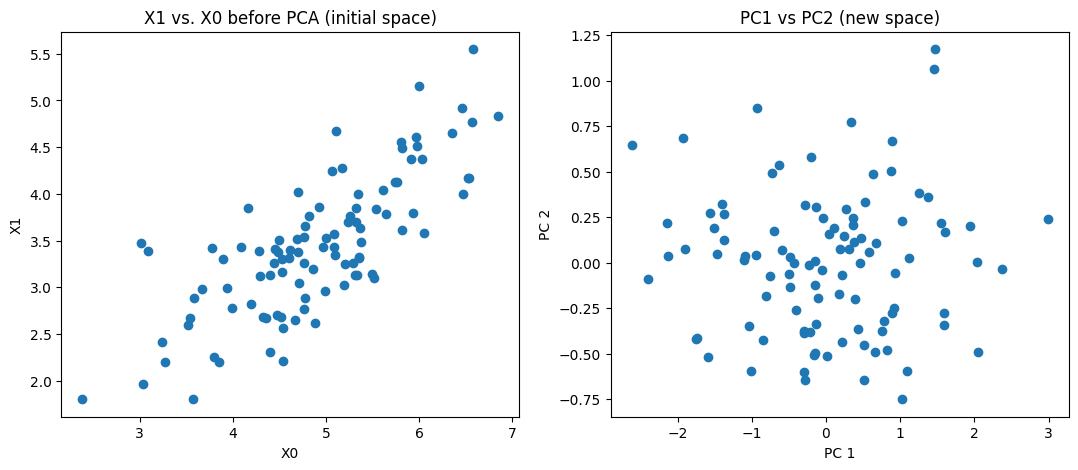

In [12]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(X.iloc[:,0], X.iloc[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_transformed[:,0], X_transformed[:,1]);

In [19]:
matriz_de_correlacion = np.corrcoef(X_transformed, rowvar=False)
correlation_matrix_rounded = np.round(matriz_de_correlacion, 3)
correlation_matrix_rounded

array([[1., 0.],
       [0., 1.]])

☝️ There is no correlation at all between your transformed features.  

This makes it easier to study the behaviour between observations since they are no longer packed along a single line.

🏁 **Don't forget to push your notebook.**  

Proceed with the challenges of the day and come back here if you have time 😉

## (Optional) With a little help from Scaling

Remember that the `projections` obtained with the `PCA` is nothing more than the dot product of your initial `X` and your transposed components.  

👉 Compute your projected values manually by performing the dot product: $X.PC^T$.  

❓ Use `np.allclose`, to check that your `X_transformed` is equal to your dot product $X.PC^T$.

In [ ]:
# YOUR CODE HERE

It's not equal 😱  

When the `PCA` of `sklearn` applies the reduction, it does so on a `X` that is, *centered*, but not *scaled*.

This means that `PCA().transform(X)` is actually equivalent to `np.dot(X - X.mean(axis=0), PC)`

In [ ]:
np.allclose(X_transformed, np.dot(X - X.mean(axis=0), PC))

That is why when using a `PCA` we often recommend to scale, more precisely standardize, your data first so that they are already centered.

This way, using `PCA` or dot product will be equivalent